In [249]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline
from sklearn import preprocessing


from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Introduction 

Breast cancer is one the most common cancers among women worlwide, representing the majority of new cancer nowdays.


# Data Preparation
The dataset used is a data breast cancer available on sklearn datasets. It was created by Dr. William H.Wolberg, physician at University Of Wisconsin Hospital at Madison, Wisconsin, USA.
Attribute Information:

1- diagnosis('B':0, 'M':1, corresponding to 357 Benign and 212 Malignant patients) 

2- target

3- target name

4- DESCR

5- Feature name

6- file name

In [265]:

#upload the dataset
df=load_breast_cancer()


In [266]:
# Attribute
df.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [267]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# Objectives

This analysis aims to observe which features are most helpful in predicting malignant or benign cancer and to see general trends that may aid us in model selection and hyper parameter selection. The goal is to classify whether the breast cancer is benign or malignant. To achieve this we have to used machine learning classification methods to fit a function that can predict the discrete class of new input 

# Data exploration

In [268]:
print(df.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

The attribute DESCR has showing there is no missing values on the dataset. Therefore, we will avoid the method to fix the missing or null data point. Now we will divide the data into "features" and "target". Features (Attributes) are the independent variables while targets (labels) are dependent variables whose values are to predicted. We want to predict malignant or benign cancer.Therefore our attribute set will consist of the "data" with "feature_names" which is stored in the X variable, and the feature will be the "target" column which is stored in y variable.

In [269]:
X = pd.DataFrame(data = df.data, columns = df.feature_names)
y = df.target
X.head()
X.shape

(569, 30)


Here, we will broke the dataset into two parts in a ratio of 75:25. It means 75%data will be used for model training and 25% for model testing.

In [270]:
# Import the train test split

from sklearn.model_selection import train_test_split


X_train,X_test, y_train,y_test= train_test_split(X,y,test_size=0.4,random_state = 42)
# verification of the shape of the split
X_train.shape,X_test.shape

((341, 30), (228, 30))

# Model Selection - Logistic Regression 

This time, we will train the algorithm. Also, we will be working with binary numbers. Therefore, we will using Logistic regression model. For that, we will import LogisticRegression() class, instantiate it, and call the fit() method along with the training data.

After the splitting the data into the training set and the test set, it is time to train the algorithm.
Therefore, we will import Regression class, and call the fit() method along with the training data.

Then, fit the model on the train set using fit() and perform prediction on the test set using predict()

In [271]:
# import class

from sklearn.linear_model import LogisticRegression


# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

# Model Evaluation using Confusion Matrix

Let find the table that is used to evaluate the performance of the algorithm. The fundatmental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise

In [272]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 76,   4],
       [  4, 144]])


We observe the confusion matrix in the form of the array object. The dimension of the matrix is 2*2 because it is binary classification. therefore, we have two classes 0 and 1. In the output, 76 and 4 represent the actual predictions, and 4 and 11 are incorrect predictions.

#  Visualizing Confusion Matrix using Heatmap

Let's visualize the results of the model in the from pf a confusion matrix using matplotlib and searborn

Text(0.5, 257.44, 'Predicted label')

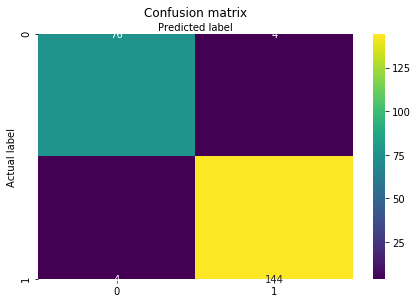

In [273]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Confusion Matrix Evaluation Metrics

Model evaluation metrics : Accuracy , precision , and recall.

In [274]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.9649122807017544
Precision: 0.972972972972973
Recall: 0.972972972972973
Mean Absolute Error: 0.03508771929824561
Mean Squared Error: 0.03508771929824561
Root Mean Squared Error: 0.1873171623163388


We got a classification rate of 96%, it is considered as good accuracy.

Precision : We can see that the Logistic Regression model predicted Malignant patients are going to suffer from breast cancer, that Malignant patients have 97% of the time.

Recall: Logistic regression model identify 97% of the time there are Malignant patients have breast cancer. 

# Receiver Operating Characteristic (ROC)

Let see the plot of the true positive rate against the false positive rate. It will shows the tradeoff between sensitivity and specifity

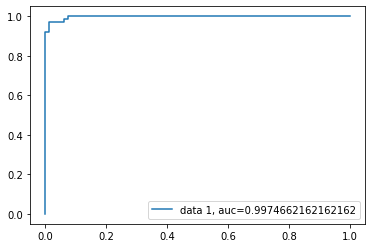

In [275]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + str (auc))
plt.legend(loc=4)
plt.show()


AUC score for the case is 0.997. AUC score 1 represents perfect classifier, 0.5 represents a worthless classifier.

# Model Selection - KNN model 

In [276]:
# import the KNeighborsClassifier class

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

print("Accuracy : {}".format(knn.score(X_test, y_test)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy : 0.9736842105263158
Mean Absolute Error: 0.03508771929824561
Mean Squared Error: 0.03508771929824561
Root Mean Squared Error: 0.1873171623163388


We got a classification rate of 97%, it is considered as good accuracy.



#  Recursive Feature Elimination (RFE) 
We will use RFE 

In [262]:
# import the Recursive Feature Elimination
from sklearn.feature_selection import RFE

selec = RFE(RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1,), n_features_to_select=15)
selec.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                     criterion='gini', max_depth=None,
                                     max_features='auto', max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

# Model Selection - Random Forest Classifier 

In [263]:
# import the Random Forest Classifier class
from sklearn.ensemble import RandomForestClassifier

def randomForest(X_train, X_test, y_train, y_test):
        clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print('Accuracy: ', accuracy_score(y_test, y_pred))
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

X_train_rfe = selec.transform(X_train)
X_test_rfe = selec.transform(X_test)

#%%time
randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.956140350877193
Mean Absolute Error: 0.043859649122807015
Mean Squared Error: 0.043859649122807015
Root Mean Squared Error: 0.20942695414584775


You can see that the value of root mean squared error is 0.026, which is slightly smaller than 10% . This means that our algorithm was also very accurate.




# Model Selection - Decision Tree Classifier 

In [264]:

# import the Decision Tree Classifier class
from sklearn.tree import DecisionTreeClassifier 

def DecisionTree(X_train, X_test, y_train, y_test):
        dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        print('Accuracy: ', accuracy_score(y_test, y_pred))
        print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
        print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
        print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
        
DecisionTree(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9517543859649122
Mean Absolute Error: 0.04824561403508772
Mean Squared Error: 0.04824561403508772
Root Mean Squared Error: 0.2196488425534897


We got a classification rate of 95%, it is considered as good accuracy.

